##**1. Introduction**

This notebook introduces our system that produces recommendations for the optimal appliances’ usage in the household.
The purpose of our work was to develop  a recommender system for users to  optimize their electricity usage and flatten the demand peak on the energy market. As a proxy for the total load in the energy market we chose the market prices. High market prices relate to a high load in the power grid and low prices to a low load. Our approach will optimize the household’s energy consumption by scheduling appliance usages into periods with low power demand in the market to contribute to a lower volatility in the energy demand.

The practical implementation of this system could be the development of the application for the smartphones.The application would recommend the household members to shift the usage of the appliances to the hours at which the price is low. In that way the household could, for example, save his own money and contribute to a sustainable power demand.
Of course, there are some appliances for which the usage cannot be shifted. For example, we cannot switch off the refrigerator, because it has to be always connected to the socket. However, appliances such as washing machines or tumble dryers are usually used for one to two hours and are not bound to fixed hours of the day. However, consumers do not always look at the prices and the current load in the power grid. They do not  use electricity optimally for themselves and the total market. 
Our work analyses the energy consumption  in households and introduces the best usage profile for the shiftable appliances based on the input data.

**Literature review**

We found some implementable approaches to create the recommendation system in the literature. However, even in the literature,  the main issue is the unavailability of large-scale private household energy consumption data. [1,  p. 6] The solution to the unavailability of the data in the literature was often solved by simulating the data.

- Luo et. al. (2020) simulated the whole data like appliance user behavior, lifestyle module, etc. for 400 households to run the personalized recommendation system, [1]

- Luo et. al. (2017) used the **simulated data** for 100 households to implement the non-intrusive energy saving appliance recommender system. [2]

Without access to any energy consumption data simulation tools, we decided on constructing our recommendation system based on a bottom-up approach. Starting from the available data, we developed a recommendation system which suits the available data.

**Data**

The input data comprises two data sets: 
ENTSOE data set (2014 – 2016; UK) with the information about day-ahead-electricity prices per hour, [3]
REFIT data set (2013 – 2015; the Loughborough area, UK) with the loads of the appliances (in Watts) in the 20 households that were recorded every 8 seconds. [4]

**Architecture of the Recommender System**

The major drawback of the REFIT dataset is a lack of information about the activity of the members in the household as well as usage and load profiles of the appliances. These features and profiles were extracted from the available data.
We created a multiagent system based on the approach proposed  by Jiménez-Bravo et. al. (2019) [5]. This system takes the input data and solves each sub-task  using the specialized  agents. 
The architecture of the recommender system based on the available data contains six agents:



In [ ]:
# set up a connection to Google Drive
from google.colab import drive
drive.mount('/content/drive')

from IPython.display import Image 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


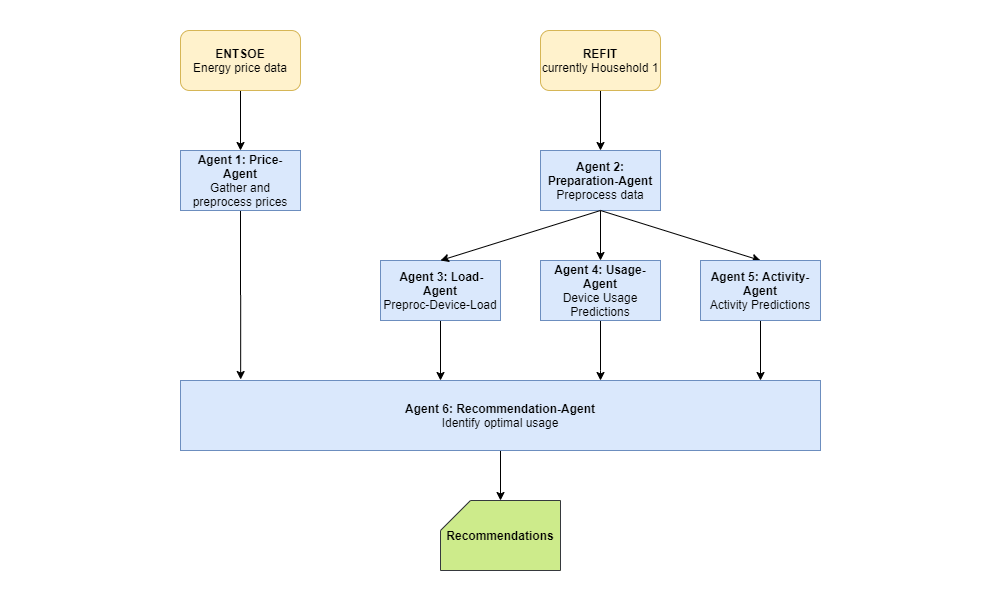

In [ ]:
Image('/content/drive/MyDrive/T4_Recommendation-system-for-demand-response-and-load-shifting/04_images/Architechture1000.png')

**Agent 1 - Price-Agent:** The Price-Agent gathers past hourly electricity prices and day-ahead-prices provided by the European Network of Transmission System Operators for Electricity (ENTSOE). It is used directly in the Recommendation Agent as a one of the contributors to optimal consumption.

**Agent 2 - Preparation Agent:** The Preparation-Agent preprocesses the input data – i.e. the REFIT dataset – for each of the three following agents (see picture). The steps that were performed by this agent include:  standard data-preprocessing as well as  creating new features and targets. 

**Agent 3 - Load-Agent:** The Load-Agent calculates the typical load profile of the appliances per hour for  a household to the date-to-be-predicted. It takes all observations until the previous date and calculates the average hourly loads. It will be used in the Recommendation Agent together with the Price Agent to detect the minimal electricity consumption price of the electricity use of each shiftable appliance at the day.

**Agent 4 - Usage-Agent:** The Usage-Agent predicts the usage of appliances to the day  based on the data available up to the  previous day. The Recommendation Agent will take these predictions to determine whether the appliance will be used at a day or not and hence whether a recommendation should be provided or not.

**Agent 5 - Activity-Agent:** The Activity-Agent predicts activity for each hour of the day. Thus, the Recommendation Agent will take these predictions for determining the optimal hour for the recommendation.

**Agent 6 - Recommendation-Agent:** The Recommendation Agent uses and integrates the outputs of the preceding agents (see picture) and provides the recommendations for the optimal usage  of the appliances in the household.

**Recommendation:** The output of the Recommendation Agent. It shows to which hour the appliances’ usage should be shifted to optimize energy consumption.  


### **1.1 Agent coding approach**

Each agent is represented in the separate notebook. In each notebook, we define a class object for each agent. The agent classes are stored in the “agents.py” script. After loading the “agents.py” script into a new notebook, we are able to use the full functionality of the preceding agents by calling the respective pipeline function of the preceding agents. 

To understand the implementation of our approach we would propose the following order to read our notebooks:  
0. Introduction to our recommendation system
1. Preparation Agent
2. Price Agent
3. Activity Agent/ Load Agent/ Usage Agent – need the Preparation Agent
4. Recommendation Agent – need all agents defined above.

Furthermore, this notebook includes a sketch of the full functionality of our system without explaining any details. Using this sketch you will be able to understand the functionality of our framework and should be able to apply our framework to the data from household 3.

**Description of the structure of the notebooks:**
The agents begin at the initial class definition. Then, the functionality of the class is sequentially expanded with the setattr() function.
Lastly, the pipeline function is introduced that contains the whole functionality of a class.  The complete class definition which is used for the “agents.py” script can always be found in the appendix to the respective agent. 


## **2. Demonstration of the framework functionality**

The purpose of this part introduce the structure of our code. You can find here the order of the steps that we performed to get the recommendations. Please,  do a quick run here before you go to the main notebooks with the shared REFIT data set for the **Household 3**. The complete functionality of the separate agents is in the notebooks with the respective agents' names.

Save the path to the data.

In [ ]:
DATA_PATH = '/content/drive/MyDrive/T4_Recommendation-system-for-demand-response-and-load-shifting/02_data/'

Load and copy the scripts (the .py format) with the helper functions and all agents.

In [ ]:
# loading .py scripts of prior agents and helper functions

# copy scripts to colab
!cp /content/drive/MyDrive/T4_Recommendation-system-for-demand-response-and-load-shifting/03_scripts/helper_functions.py .
!cp /content/drive/MyDrive/T4_Recommendation-system-for-demand-response-and-load-shifting/03_scripts/agents.py .

Load libraries, Helper functions and the Preparation Agent module. Create an object *helper* from the Helper class.

In [ ]:
# loading necessary libraries
import pandas as pd
import numpy as np

from helper_functions import Helper
from agents import Preparation_Agent

helper = Helper()

After the creation of the object, you can access any function in the class. So, here, please load the dataset for the household three and save it as a *household* data frame.

In [ ]:
# load household data
household = helper.load_household(DATA_PATH, 1)
#household = helper.load_household(DATA_PATH, 3)
household

,Time,Unix,Aggregate,Fridge,Chest Freezer,Upright Freezer,Tumble Dryer,Washing Machine,Dishwasher,Computer Site,Television Site,Electric Heater,Issues
Time,,,,,,,,,,,,,
2013-10-09 13:06:17,2013-10-09 13:06:17,1381323977,523,74,0,69,0,0,0,0,0,1,0
2013-10-09 13:06:31,2013-10-09 13:06:31,1381323991,526,75,0,69,0,0,0,0,0,1,0
2013-10-09 13:06:46,2013-10-09 13:06:46,1381324006,540,74,0,68,0,0,0,0,0,1,0
2013-10-09 13:07:01,2013-10-09 13:07:01,1381324021,532,74,0,68,0,0,0,0,0,1,0
2013-10-09 13:07:15,2013-10-09 13:07:15,1381324035,540,74,0,69,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-10 11:56:05,2015-07-10 11:56:05,1436529365,187,0,45,0,0,0,0,0,0,1,0
2015-07-10 11:56:12,2015-07-10 11:56:12,1436529372,185,0,45,0,0,0,0,0,0,1,0
2015-07-10 11:56:18,2015-07-10 11:56:18,1436529378,181,0,45,0,0,0,0,0,0,1,0


In [ ]:
#load price data:
price_df = helper.create_day_ahead_prices_df(DATA_PATH, 'Day-ahead Prices_201501010000-201601010000.csv')

###**2.1 Price Agent**

Load the *Price Agent* and save as a *price* data frame.

In [ ]:
# load the Price_Agent from the agents.py script
from agents import Price_Agent
price = Price_Agent(price_df)
price.return_day_ahead_prices("2014-02-01").head()

2014-02-01 00:00:00    27.94
2014-02-01 01:00:00    25.50
2014-02-01 02:00:00    20.92
2014-02-01 03:00:00    17.38
2014-02-01 04:00:00    19.85
Freq: H, Name: Price, dtype: float64

###**2.2 Preparation Agent**

The main purpose of the *Preparation Agent* is to preprocess the input data to make them usable for the next agents. 

**Determining active appliances and shiftable appliances**

In this step you have to manually predefine the **active appliances** for the *Activity Agent* and **shiftable appliances** for *Load Agent*.

We can determine with the **active applinces**, when the household members are at home.

The **shiftable** are those appliances, to which we can get a prediction for shifting the use of them.

In [ ]:
# Checking the column labels for appliances in the Household
household.head()

,Time,Unix,Aggregate,Fridge,Chest Freezer,Upright Freezer,Tumble Dryer,Washing Machine,Dishwasher,Computer Site,Television Site,Electric Heater,Issues
Time,,,,,,,,,,,,,
2013-10-09 13:06:17,2013-10-09 13:06:17,1381323977,523,74,0,69,0,0,0,0,0,1,0
2013-10-09 13:06:31,2013-10-09 13:06:31,1381323991,526,75,0,69,0,0,0,0,0,1,0
2013-10-09 13:06:46,2013-10-09 13:06:46,1381324006,540,74,0,68,0,0,0,0,0,1,0
2013-10-09 13:07:01,2013-10-09 13:07:01,1381324021,532,74,0,68,0,0,0,0,0,1,0
2013-10-09 13:07:15,2013-10-09 13:07:15,1381324035,540,74,0,69,0,0,0,0,0,1,0


In [ ]:
# Checking the readme for additional information
readme = DATA_PATH + 'REFIT_Readme.txt'
helper.read_txt(readme)

REFIT: Electrical Load Measurements

INFORMATION
Collection of this dataset was supported by the Engineering and Physical Sciences Research Council (EPSRC) via the project entitled Personalised Retrofit Decision Support Tools for UK Homes using Smart Home Technology (REFIT), which is a collaboration among the Universities of Strathclyde, Loughborough and East Anglia. The dataset includes data from 20 households from the Loughborough area over the period 2013 - 2015. Additional information about REFIT is available from www.refitsmarthomes.org.

LICENCING
This work is licensed under the Creative Commons Attribution 4.0 International Public License. See https://creativecommons.org/licenses/by/4.0/legalcode for further details.
Please cite the following paper if you use the dataset:

@inbook{278e1df91d22494f9be2adfca2559f92,
title = "A data management platform for personalised real-time energy feedback",
keywords = "smart homes, real-time energy, smart energy meter, energy consumption, Ele

In [ ]:
# Manually specifying the active appliances and shiftable appliances
print('\n'.join(household.columns))

# Household 1
active_appliances = ['Tumble Dryer', 'Washing Machine', 'Dishwasher', 'Computer Site', 'Television Site']
shiftable_devices = ['Tumble Dryer', 'Washing Machine', 'Dishwasher']

Time
Unix
Aggregate
Fridge
Chest Freezer
Upright Freezer
Tumble Dryer
Washing Machine
Dishwasher
Computer Site
Television Site
Electric Heater
Issues


**Determining the optimal thresholds**

Examine the threshold for the device usage and activity features that ensures to minimize the noisy loads.



100%|██████████| 6/6 [00:01<00:00,  3.01it/s]


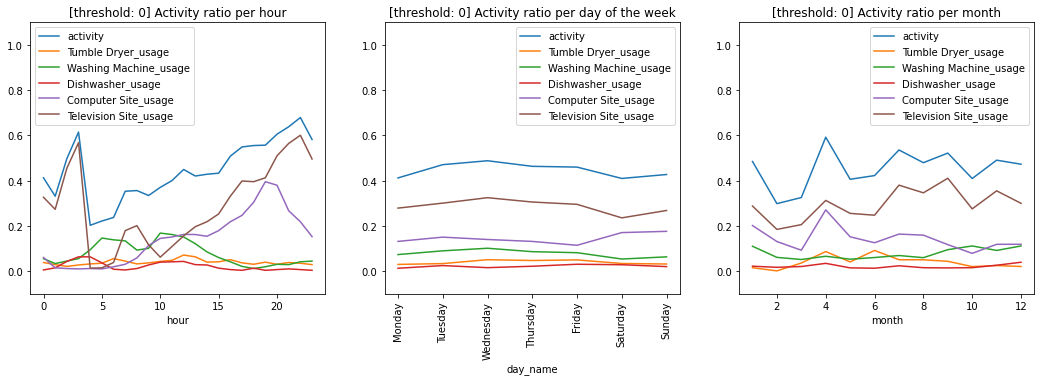

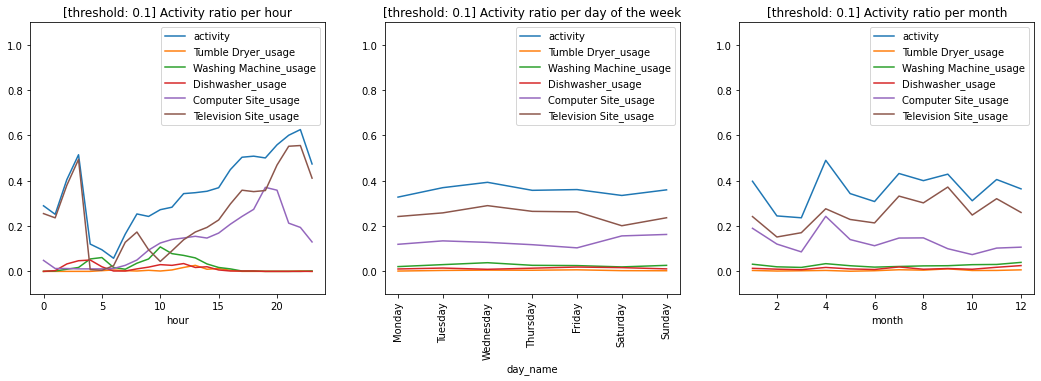

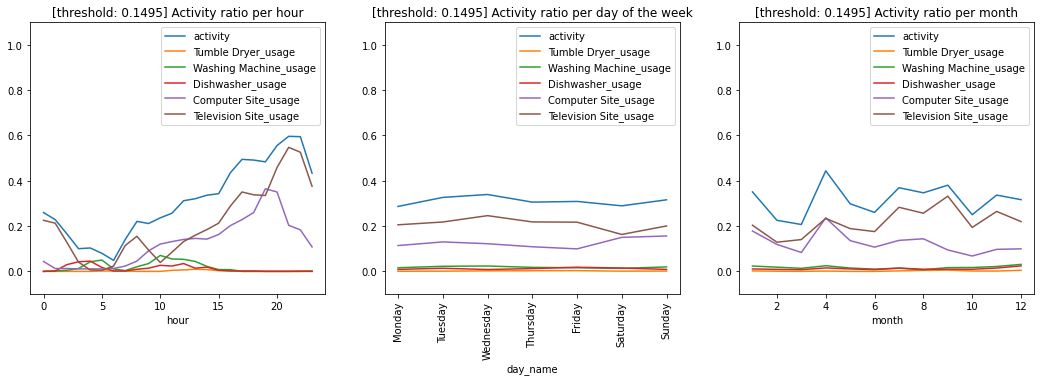

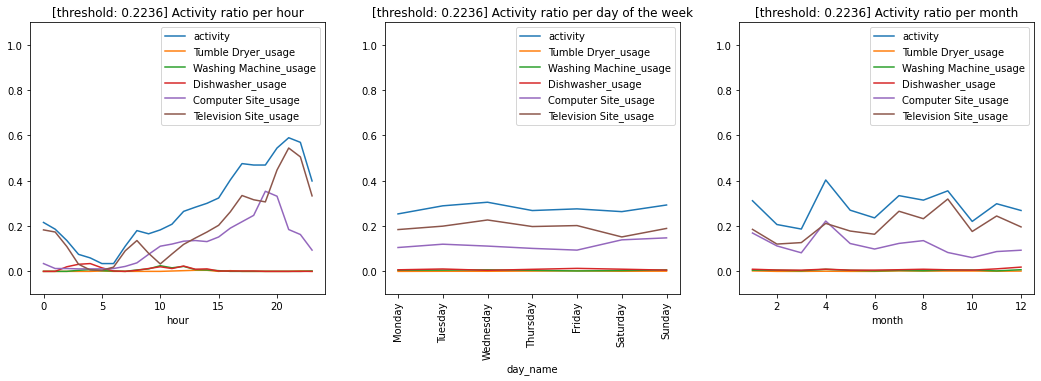

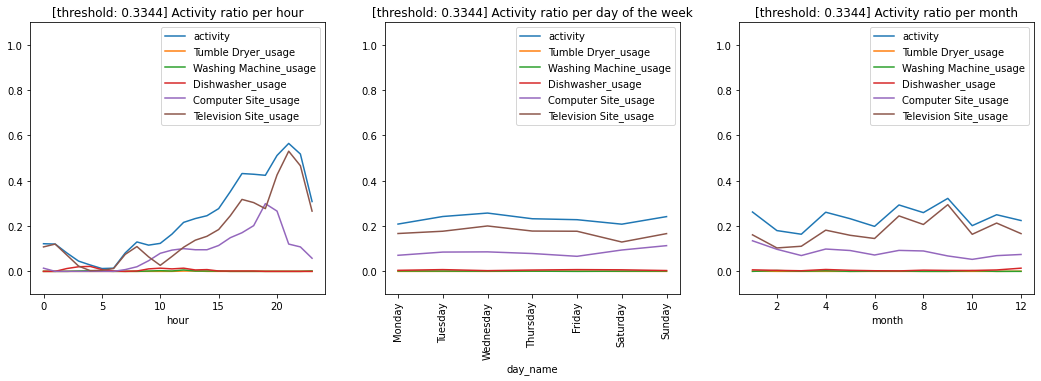

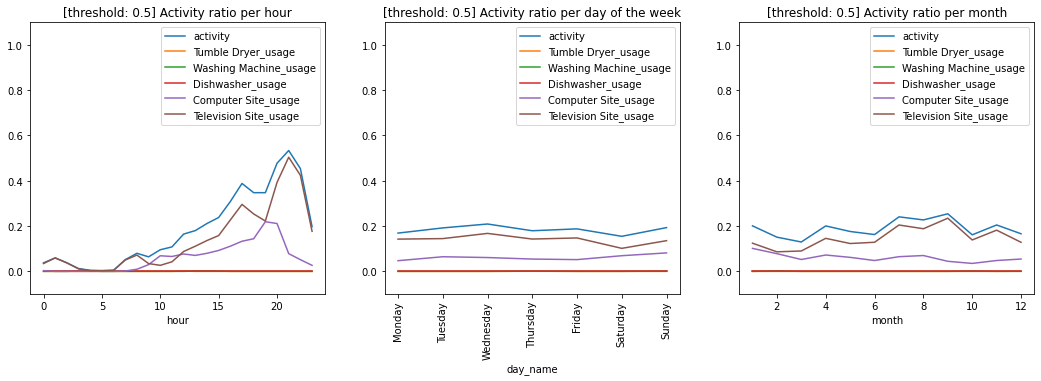

In [ ]:
# Determining the optimal threshold for activity and device usage
prep = Preparation_Agent(household)

thresholds = [0] + list(np.geomspace(.1, .5, 5))

# Data-Preparation
df = prep.truncate(household)
df = prep.scale(df)
df = helper.aggregate(df, '60T')

# Graphical analysis of candidate thresholds
prep.validate_thresholds(df, thresholds, active_appliances)

### **2.3 Activity Agent**

*Activity Agent* takes the data frame preprocessed by the *Preparation Agent* and returns the data with the predictions of the activity in the household.

In [ ]:
# household specific configuration
threshold = .15
#threshold = 0
active_appliances = active_appliances   # specified at the preparation agent above

In [ ]:
# Change config for slight parameter tuning. 
# For deeper changes change the pipeline function at the preparation agent.

truncation_params = {
    'features': 'all', 
    'factor': 1.5, 
    'verbose': 0
}

scale_params = {
    'features': 'all', 
    'kind': 'MinMax', 
    'verbose': 0
}

aggregate_params = {
    'resample_param': '60T'
}

activity_params = {
    'active_appliances': active_appliances,
    'threshold': threshold 
}

time_params = {
    'features': ['hour', 'day_name']
}

activity_lag_params = {
    'features': ['activity'],
    'lags': [24, 48, 72]
}

activity_pipe_params = {
    'truncate': truncation_params,
    'scale': scale_params,
    'aggregate': aggregate_params,
    'activity': activity_params,
    'time': time_params,
    'activity_lag': activity_lag_params
}

In [ ]:
# calling the activity preparation pipeline
activity_df = prep.pipeline_activity(household, activity_pipe_params)
activity_df

,activity,hour,activity_lag_24,activity_lag_48,activity_lag_72,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
Time,,,,,,,,,,,
2013-10-09 13:00:00,0,13,NaN,NaN,NaN,0,0,0,0,0,1
2013-10-09 14:00:00,0,14,NaN,NaN,NaN,0,0,0,0,0,1
2013-10-09 15:00:00,0,15,NaN,NaN,NaN,0,0,0,0,0,1
2013-10-09 16:00:00,0,16,NaN,NaN,NaN,0,0,0,0,0,1
2013-10-09 17:00:00,1,17,NaN,NaN,NaN,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2015-07-10 07:00:00,0,7,0.0,0.0,0.0,0,0,0,0,0,0
2015-07-10 08:00:00,0,8,0.0,0.0,0.0,0,0,0,0,0,0
2015-07-10 09:00:00,0,9,0.0,0.0,0.0,0,0,0,0,0,0


In [ ]:
# Calling the activity agent for the date to be predicted 
from agents import Activity_Agent

activity = Activity_Agent(activity_df)

# day to be predicted
date = "2014-08-20"

# Predicting the activity for the day to be predicted
split_params = {'train_start': '2013-11-01', 'test_delta': {'days':1, 'seconds':-1}, 'target': 'activity'}
activity_preds = activity.pipeline(activity_df, date, 'logit', split_params)
activity_preds

Time
2014-08-20 00:00:00    0.175490
2014-08-20 01:00:00    0.174936
2014-08-20 02:00:00    0.174383
2014-08-20 03:00:00    0.173832
2014-08-20 04:00:00    0.173282
2014-08-20 05:00:00    0.172733
2014-08-20 06:00:00    0.172186
2014-08-20 07:00:00    0.560021
2014-08-20 08:00:00    0.409309
2014-08-20 09:00:00    0.170552
2014-08-20 10:00:00    0.170010
2014-08-20 11:00:00    0.556238
2014-08-20 12:00:00    0.555291
2014-08-20 13:00:00    0.554343
2014-08-20 14:00:00    0.553396
2014-08-20 15:00:00    0.673204
2014-08-20 16:00:00    0.551499
2014-08-20 17:00:00    0.550551
2014-08-20 18:00:00    0.526718
2014-08-20 19:00:00    0.669820
2014-08-20 20:00:00    0.668971
2014-08-20 21:00:00    0.668121
2014-08-20 22:00:00    0.667271
2014-08-20 23:00:00    0.395477
Freq: 60T, dtype: float64

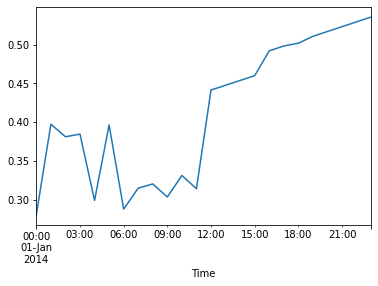

In [ ]:
# plot the predictions for quick validation
activity_preds.plot();

In [ ]:
########## need to decide on evaluation method ###########
split_params = {'train_start': '2013-11-01', 'test_delta': {'days':1, 'seconds':-1}, 'target': 'activity'}

auc_train, auc_test, _ = activity.evaluate_2(activity_df, 'logit', split_params)

# printing the scores
print(f'\n\n[train data] auc score: {auc_train}\n[test data] auc score: {auc_test}')

100%|██████████| 556/556 [00:15<00:00, 35.62it/s]



[train data] auc score: 0.7170171425589704
[test data] auc score: 0.7193890335654205


### **2.4 Load agent**

This agent takes a preprocessed by the *Preparation Agent* data frame as an input and returns the typical load profile to the date-to-be-predicted.

In [ ]:
# household specific configuration
threshold = threshold                   # specified at the activity agent above
shiftable_devices = shiftable_devices   # specified at the preparation agent above

In [ ]:
# config for the pipline function
truncation_params = {
    'features': 'all', 
    'factor': 1.5, 
    'verbose': 0
}

scale_params = {
    'features': 'all', 
    'kind': 'MinMax', 
    'verbose': 0
}

aggregate_params = {
    'resample_param': '60T'
}

device_params = {
    'threshold': threshold
}

load_pipe_params = {
    'truncate': truncation_params,
    'scale': scale_params,
    'aggregate': aggregate_params,
    'shiftable_devices': shiftable_devices, 
    'device': device_params
}

In [ ]:
# calling the load pipline function
from agents import Load_Agent
load_df, _, _ = prep.pipeline_load(household, load_pipe_params)
load_df

,Tumble Dryer,Washing Machine,Dishwasher
Time,,,
2013-10-09 13:00:00,0.0,0.0,0.0
2013-10-09 14:00:00,0.0,0.0,0.0
2013-10-09 15:00:00,0.0,0.0,0.0
2013-10-09 16:00:00,0.0,0.0,0.0
2013-10-09 17:00:00,0.0,0.0,0.0
...,...,...,...
2015-07-10 07:00:00,0.0,0.0,0.0
2015-07-10 08:00:00,0.0,0.0,0.0
2015-07-10 09:00:00,0.0,0.0,0.0


In [ ]:
load_df.describe()

,Tumble Dryer,Washing Machine,Dishwasher
count,13520.000000,13520.000000,13520.000000
mean,0.591432,3.317218,10.267475
std,14.784178,24.859087,90.381380
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,905.180288,733.000000,1087.478788


In [ ]:
# calling the load agent 
load = Load_Agent(load_df)

# day to be predicted
date = date             # specified at the activity agent

# Calculating the average load profiles for the day to be predicted
load_table = load.pipeline(load_df, date, shiftable_devices) 
load_table

,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
Tumble Dryer,355.682148,30.426509,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Washing Machine,147.090697,15.920504,3.307045,3.020827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dishwasher,814.583135,40.581581,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **2.5 Usage Agent**

Usage Agent takes the preprocessed data from the *Preparation Agent* as an input and returns the usage predictions to the date-to-be-predicted.

In [ ]:
truncation_params = {
    'features': 'all', 
    'factor': 1.5, 
    'verbose': 0
}

scale_params = {
    'features': 'all', 
    'kind': 'MinMax', 
    'verbose': 0
}

aggregate_params = {
    'resample_param': '60T'
}
aggregate_params24_H = {
    'resample_param': '24H'
}

activity_params = {
    'active_appliances': active_appliances,
    'threshold': .15
}

time_params = {
    'features': ['hour', 'day_name']
}

activity_lag_params = {
    'features': ['activity'],
    'lags': [24, 48, 72]
}

device = {
    'threshold' : .15
}

activity_pipe_params = {
    'truncate': truncation_params,
    'scale': scale_params,
    'activity': activity_params,
    'aggregate_hour': aggregate_params,
    'aggregate_day': aggregate_params24_H,
    'time': time_params,
    'activity_lag': activity_lag_params,
    'shiftable_devices' : shiftable_devices,
    'device': device
}

# calling the preparation pipeline
prep = Preparation_Agent(household)
usage_df = prep.pipeline_usage(household, activity_pipe_params)

#display all potential variables for predicting device usage likelihood
usage_df.head()

,activity,Tumble Dryer_usage,Washing Machine_usage,Dishwasher_usage,periods_since_last_activity,periods_since_last_Tumble Dryer_usage,periods_since_last_Washing Machine_usage,periods_since_last_Dishwasher_usage,hour,activity_lag_1,activity_lag_2,activity_lag_3,Tumble Dryer_usage_lag_1,Tumble Dryer_usage_lag_2,Tumble Dryer_usage_lag_3,Washing Machine_usage_lag_1,Washing Machine_usage_lag_2,Washing Machine_usage_lag_3,Dishwasher_usage_lag_1,Dishwasher_usage_lag_2,Dishwasher_usage_lag_3,active_last_2_days,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-10-09,1,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1
2013-10-10,1,0,0,1,1.0,2.0,2.0,2.0,0,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,1,0,0,0,1,0,0
2013-10-11,0,0,0,0,1.0,3.0,3.0,1.0,0,1.0,1.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,1.0,0.0,NaN,1,0,0,0,0,0,0
2013-10-12,0,0,0,0,2.0,4.0,4.0,2.0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,1,0,0,0,0
2013-10-13,0,0,0,0,3.0,5.0,5.0,3.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1,0,0,0


In [ ]:
from agents import Usage_Agent
Usage_Agent_i = Usage_Agent(usage_df, shiftable_devices[0]) 

In [ ]:
# "2014-01-01" - is the date-to-be-predicted
Usage_Agent_i.pipeline(usage_df,  date, 'logit', train_start = '2013-11-01' )

array([0.04276853])

In [ ]:
Usage_Agent_i.evaluate(usage_df, "logit", '2013-11-01', predict_start='2014-08-01', predict_end= -1)
usage_df
print("mean_auc_on_train = "+ str(auc_train) + " | test_auc = " + str(auc_test))

In [ ]:
usage_df

,activity,Tumble Dryer_usage,Washing Machine_usage,Dishwasher_usage,periods_since_last_activity,periods_since_last_Tumble Dryer_usage,periods_since_last_Washing Machine_usage,periods_since_last_Dishwasher_usage,hour,activity_lag_1,activity_lag_2,activity_lag_3,Tumble Dryer_usage_lag_1,Tumble Dryer_usage_lag_2,Tumble Dryer_usage_lag_3,Washing Machine_usage_lag_1,Washing Machine_usage_lag_2,Washing Machine_usage_lag_3,Dishwasher_usage_lag_1,Dishwasher_usage_lag_2,Dishwasher_usage_lag_3,active_last_2_days,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-10-09,1,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1
2013-10-10,1,0,0,1,1.0,2.0,2.0,2.0,0,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,1,0,0,0,1,0,0
2013-10-11,0,0,0,0,1.0,3.0,3.0,1.0,0,1.0,1.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,1.0,0.0,NaN,1,0,0,0,0,0,0
2013-10-12,0,0,0,0,2.0,4.0,4.0,2.0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,1,0,0,0,0
2013-10-13,0,0,0,0,3.0,5.0,5.0,3.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-06,1,0,0,1,1.0,72.0,1.0,3.0,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,0,0,0
2015-07-07,1,0,0,0,1.0,73.0,2.0,1.0,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0,0,0,0,1,0
2015-07-08,1,0,0,1,1.0,74.0,3.0,2.0,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,0,0,0,0,0,1


### **2.6 Recommendation Agent**

Takes the data of the *Activity*, *Load* and *Usage*  agents as an input data and returns the recommendations for the shiftable devices.

In [ ]:
from agents import Recommendation_Agent
import pandas as pd

#itinialize recommendation agent with pre-processed data:
recommend = Recommendation_Agent(activity_df, usage_df, load_df, price_df, shiftable_devices)

Finally, we can compute the recommendations with the recommendation agent, for given probability thresholds.

In [ ]:
usage_prob_threshold = 0.3
activity_prob_threshold = 0.3
date = date #specified at the activity agent
recommend.pipeline(date, activity_prob_threshold, usage_prob_threshold)

,recommendation_date,device,best_launch_hour,no_recommend_flag_activity,no_recommend_flag_usage
0,2014-08-20,Tumble Dryer,23,0,1
0,2014-08-20,Washing Machine,23,0,0
0,2014-08-20,Dishwasher,23,0,1


## **References**

1. Luo, F., Ranzi, G., Kong, W. et. al. (2020): A Personalized Residential Energy Usage Recommendation System Based on Load Monitoring and Collaborative Filtering in IEEE Transactions on Industrial Informatics, PP (99):1-1, April 2020, https://doi.org/10.1109/TII.2020.2983212
2. Luo, F., Ranzi, G., Kong, W. et.al. (2017): Non-intrusive energy saving appliance recommender system for smart grid residential users," in IET Generation, Transmission & Distribution, vol. 11, no. 7, pp. 1786-1793, 11 5 2017, https://doi.org/10.1049/iet-gtd.2016.1615
3. ENTSOE (2016): Day-ahead Prices for UK https://transparency.entsoe.eu/transmission-domain/r2/dayAheadPrices/show, access date: 10.12.2020
4. Murray, D., Stankovic, L., Stankovic, V. (2017), An electrical load measurements dataset of United Kingdom households from a two-year longitudinal study. Sci Data 4, 160122 (2017). https://doi.org/10.1038/sdata.2016.122
5.  Jiménez-Bravo, D., Pérez-Marcos, J., De la Iglesia ,D. H. et. al. (2019): Multi-Agent Recommendation System for Electrical Energy Optimization and Cost Saving in Smart Homes in Energies 2019, 12, 1317 https://doi.org/10.3390/en12071317